In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

df=pd.read_csv('https://raw.githubusercontent.com/neo-stark-team/Datasets/main/Mall_Customers.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
# finding outliers
dfa=df['Annual Income (k$)']
iqr=dfa.quantile(.75)-dfa.quantile(.25)
l_limit=dfa.quantile(.25)-(1.5*iqr)
u_limit=dfa.quantile(.75)+(1.5*iqr)
dfa_outliers=df[(dfa<l_limit)|(dfa>u_limit)]
print(dfa_outliers)

     CustomerID Gender  Age  Annual Income (k$)  Spending Score (1-100)
198         199   Male   32                 137                      18
199         200   Male   30                 137                      83


In [ ]:
df=df[~((df['Annual Income (k$)']<l_limit)|(df['Annual Income (k$)']>u_limit))]
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
193,194,Female,38,113,91
194,195,Female,47,120,16
195,196,Female,35,120,79
196,197,Female,45,126,28


<Axes: xlabel='Annual Income (k$)'>

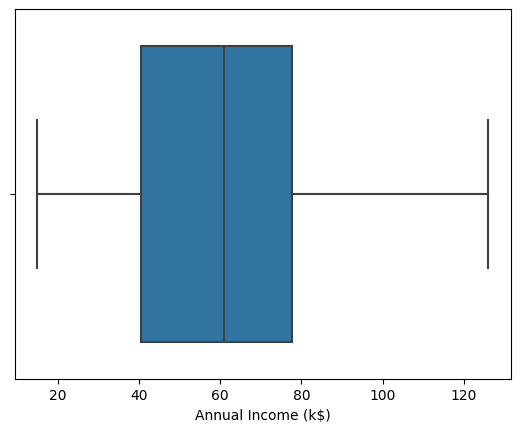

In [ ]:
import seaborn as sns
sns.boxplot(x=df['Annual Income (k$)'])

In [ ]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
df.drop_duplicates()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
193,194,Female,38,113,91
194,195,Female,47,120,16
195,196,Female,35,120,79
196,197,Female,45,126,28


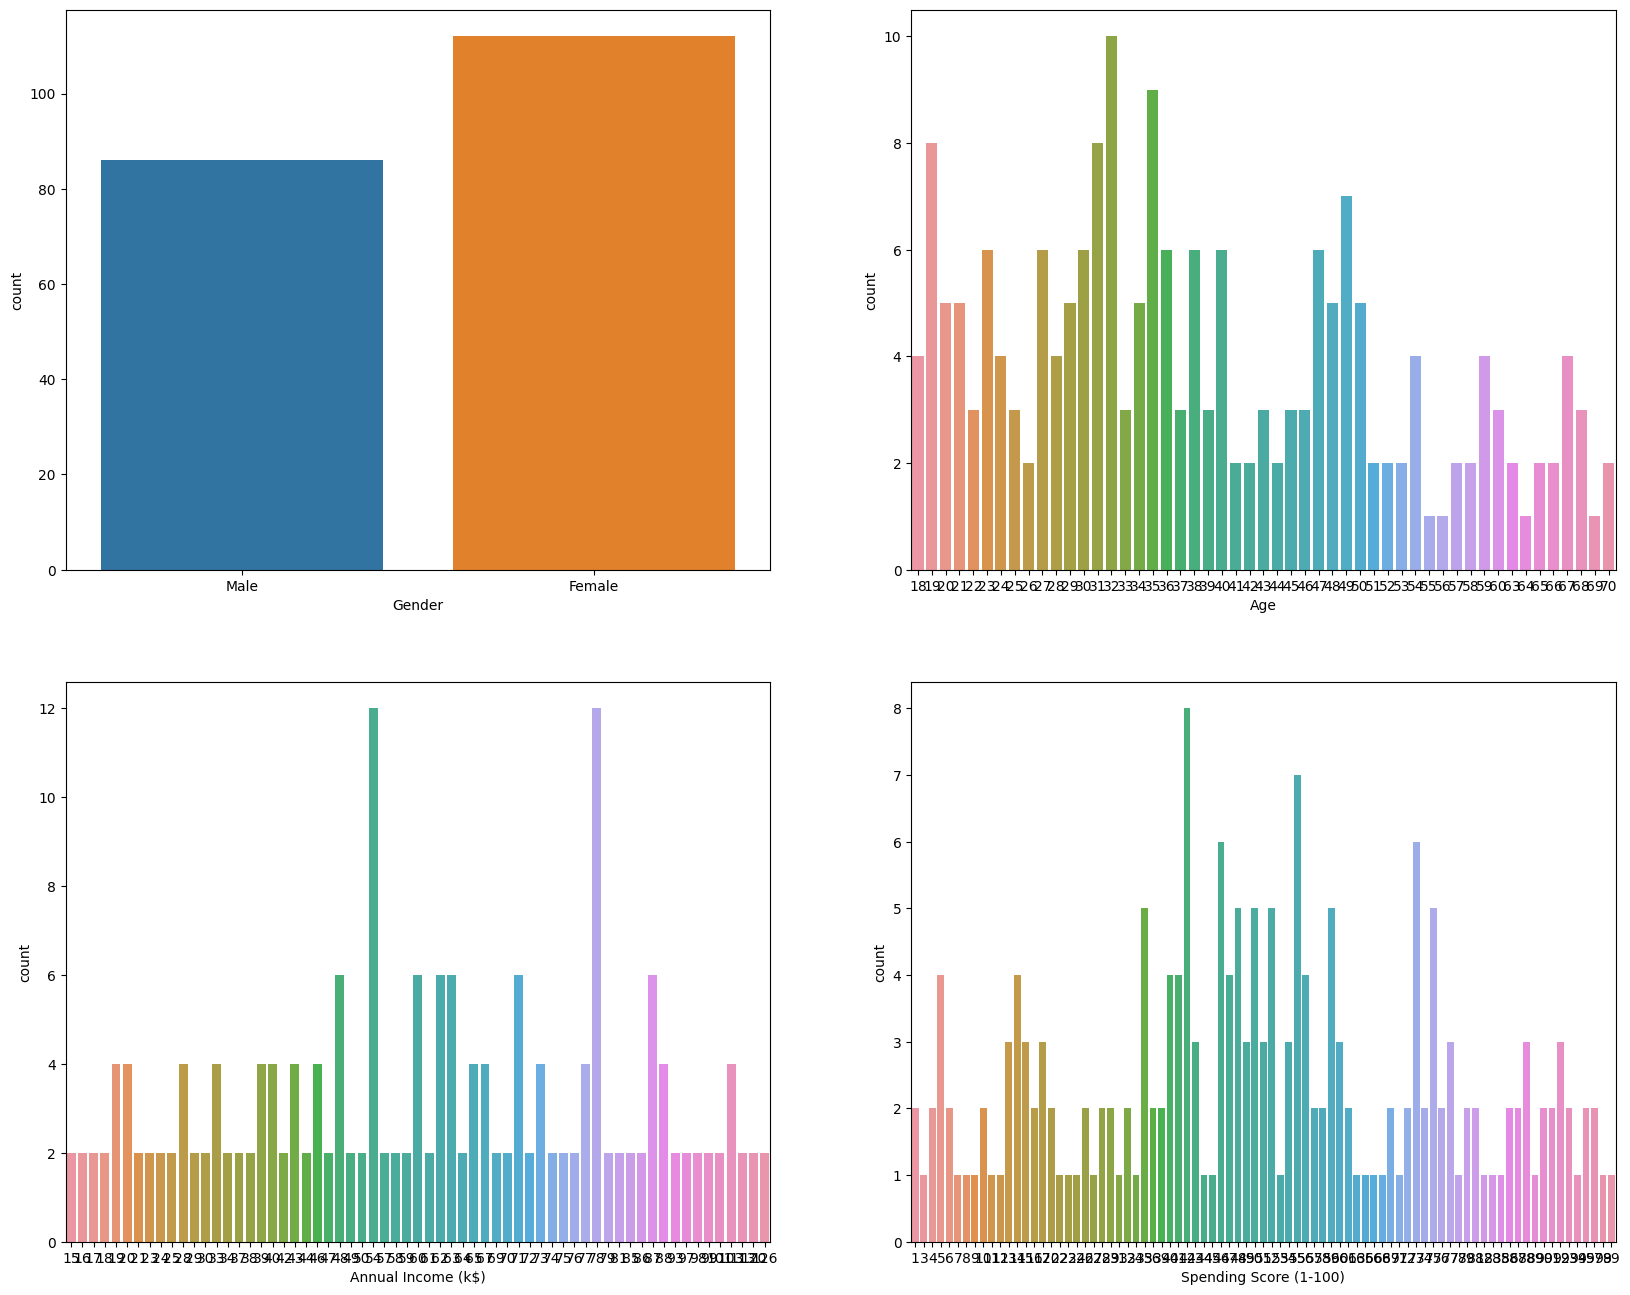

In [ ]:
x=df.drop('CustomerID',axis=1)
plt.figure(figsize=(20,16))
for i,col in enumerate(x,1):
 plt.subplot(2,2,i)
 sns.countplot(data=df,x=col)
 plt.xlabel(col)
 plt.ylabel('count')
plt.show()

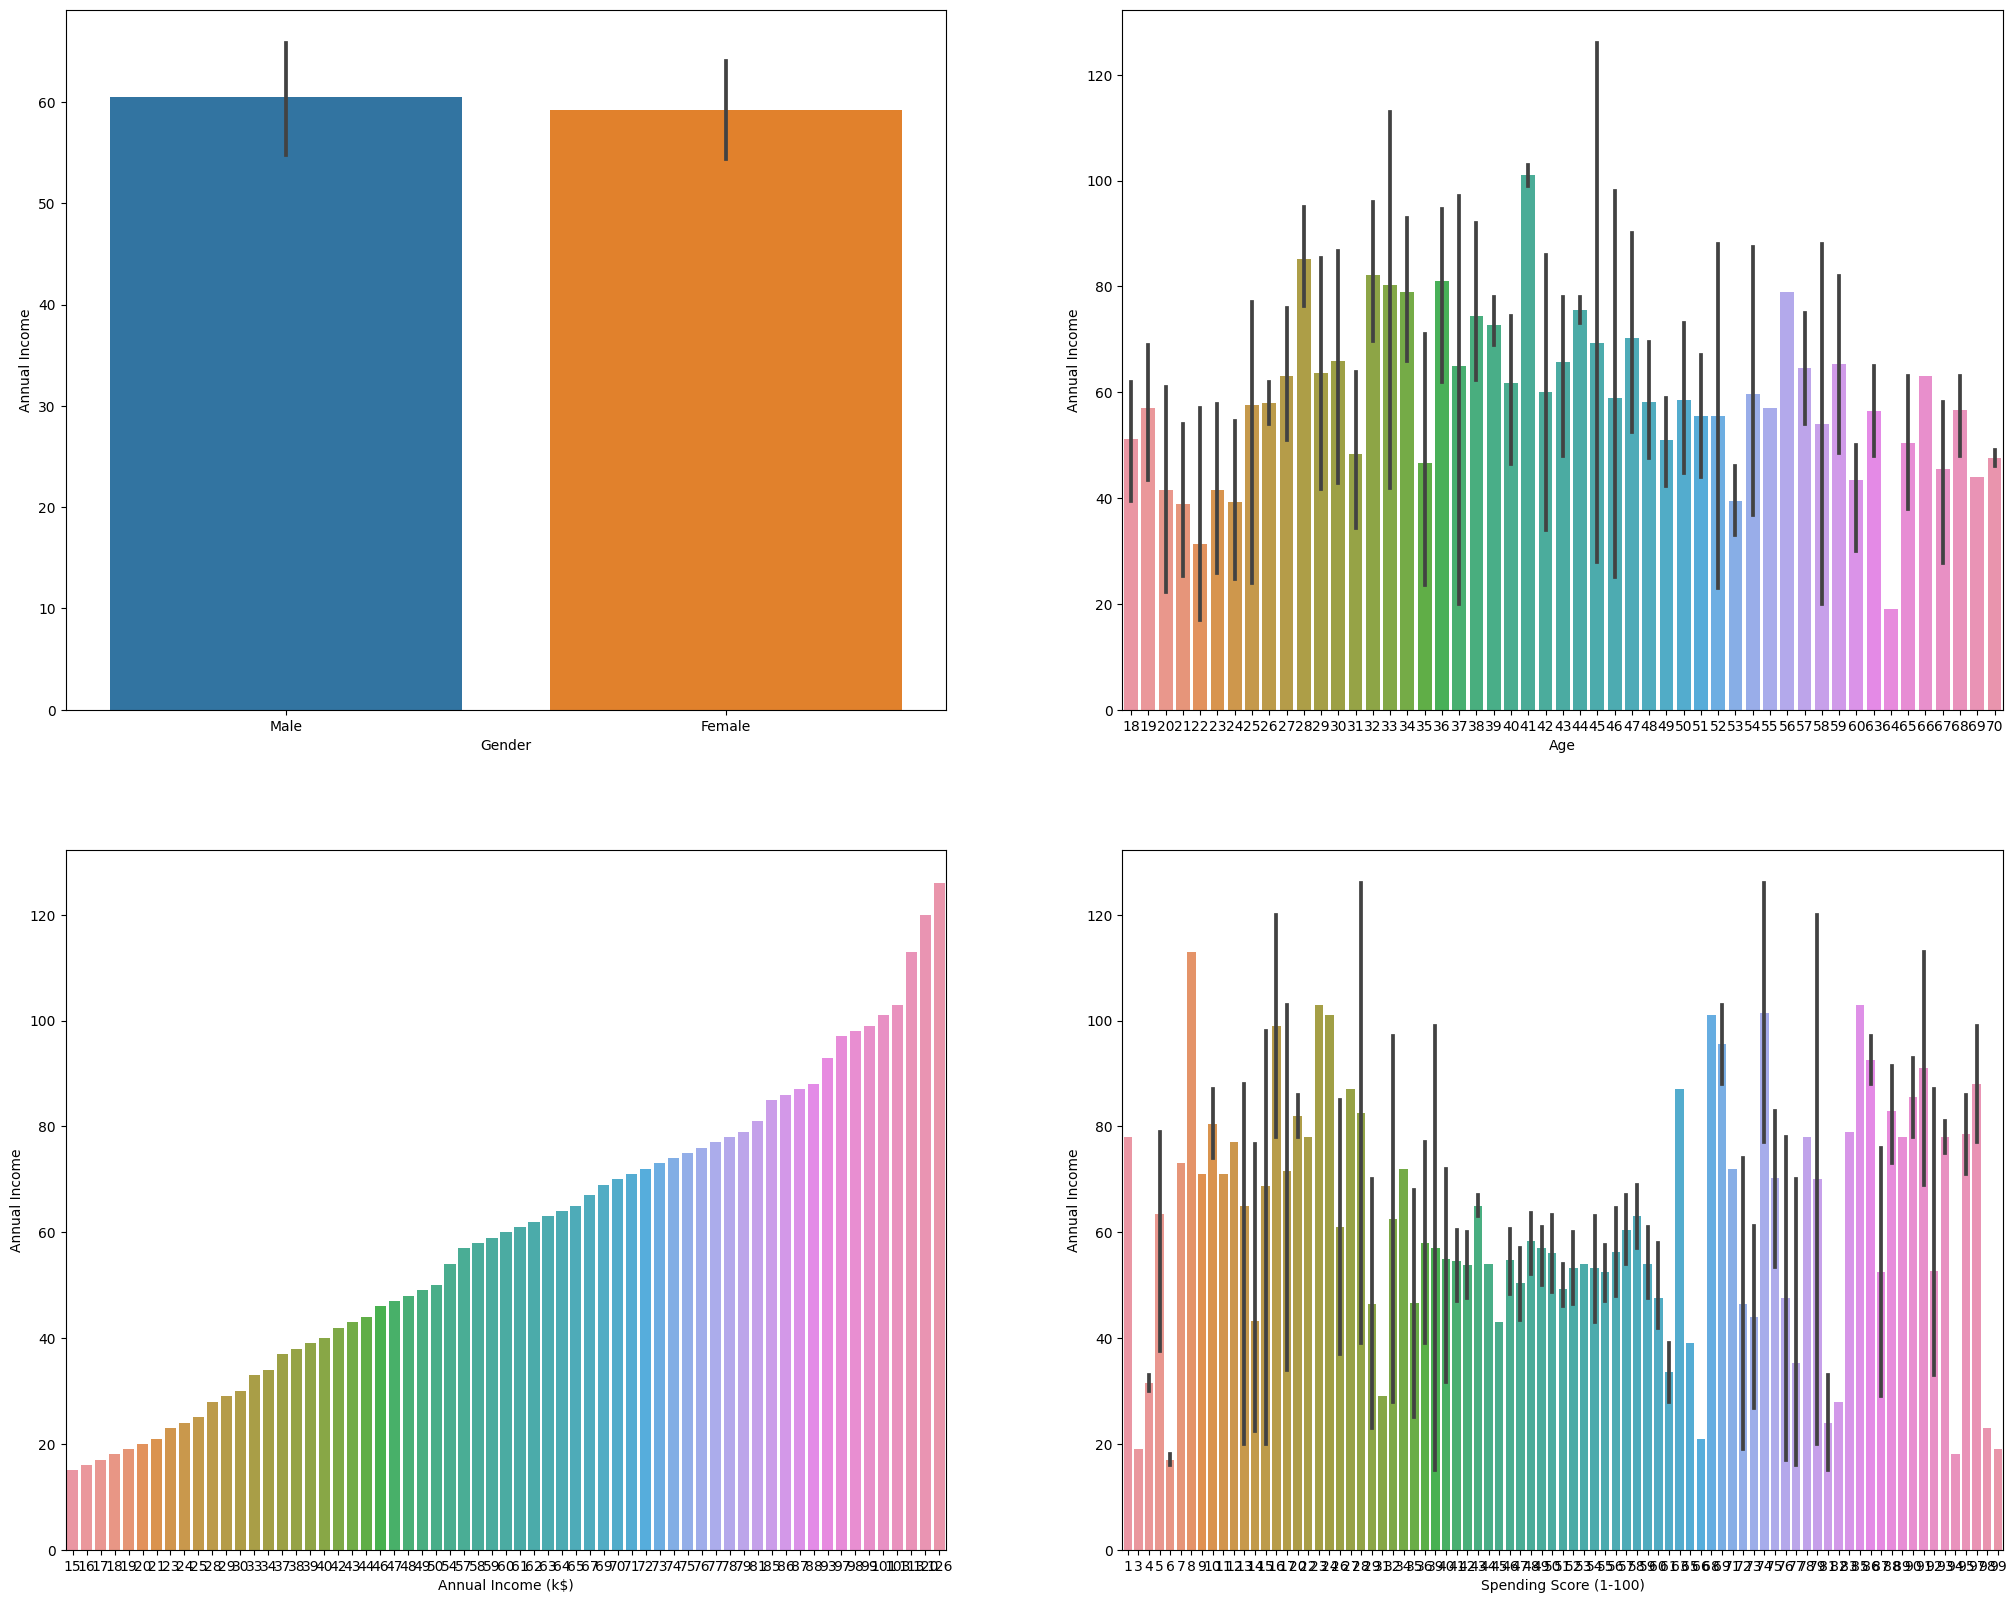

In [ ]:
x=df.drop('CustomerID',axis=1)
Y=df['Annual Income (k$)']
plt.figure(figsize=(25,20))
for i,col in enumerate(x,1):
 plt.subplot(2,2,i)
 sns.barplot(data=df,x=col,y=Y)
 plt.xlabel(col)
 plt.ylabel('Annual Income')
plt.show()

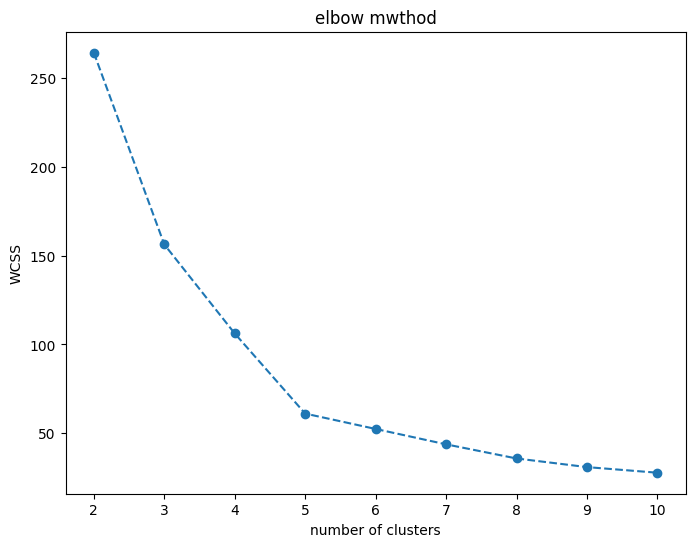

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
x=df[['Annual Income (k$)','Spending Score (1-100)']]

scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

wcss=[]
for i in range(2,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
  kmeans.fit(x_scaled)
  wcss.append(kmeans.inertia_)

  #plot elbow graph
plt.figure(figsize=(8,6))
plt.plot(range(2,11),wcss,marker='o',linestyle="--")
plt.title('elbow mwthod')
plt.xlabel('number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans=KMeans(n_clusters=5,init='k-means++',max_iter=300,n_init=10,random_state=56)
kmeans.fit(x_scaled)
df['Cluster']=kmeans.labels_
df


<ipython-input-11-ebf31627612f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cluster']=kmeans.labels_


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
193,194,Female,38,113,91,1
194,195,Female,47,120,16,2
195,196,Female,35,120,79,1
196,197,Female,45,126,28,2


In [ ]:
from sklearn.metrics import silhouette_score
silhouette_avg=silhouette_score(x,kmeans.labels_)
print(silhouette_avg)

0.5606825090788626


**KNN**

In [ ]:
model=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
model.fit(x)
labels=model.labels_
df['Cluster']=labels
print(df.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Cluster  
0        4  
1        3  
2        4  
3        3  
4        4  


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
<ipython-input-17-7313b80af063>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cluster']=labels


In [ ]:
from sklearn.metrics import silhouette_score
silhouette_avg=silhouette_score(x,labels)
print(silhouette_avg)

0.5593054601700206
